
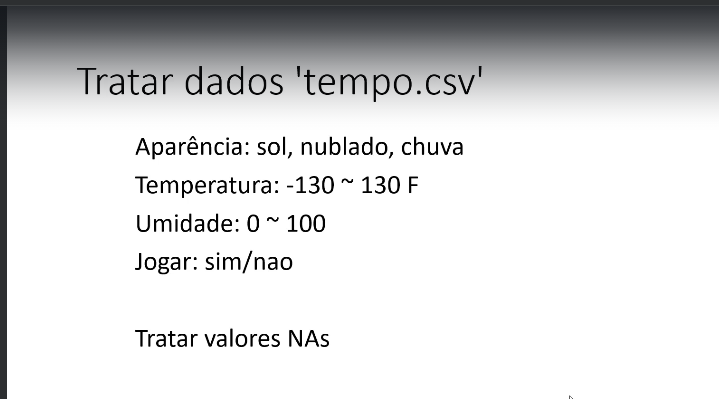

Importando bibliotecas



In [3]:
import pandas as pd
import seaborn as srn
import statistics  as sts
from google.colab import files

passando o conjunto de dados para o colab


In [4]:
upload = files.upload()

Saving tempo.csv to tempo.csv


Criando dataset com pandas lendo o csv


In [6]:
#importar dados
dataset = pd.read_csv("tempo.csv", sep=";")
#visulizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [7]:
#tamanho
dataset.shape

(14, 5)

### **Vizualização dos dados Categoricos**

In [10]:
#Aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

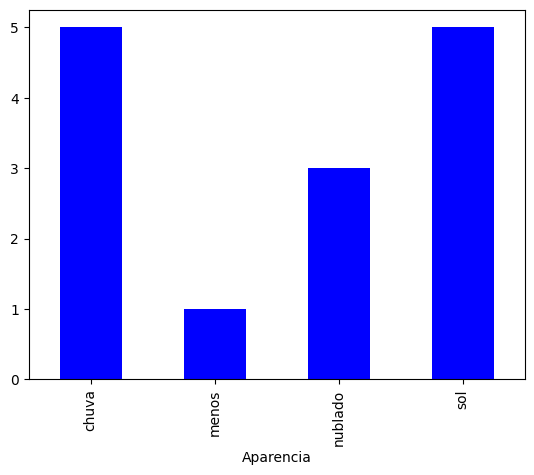

In [11]:
agrupado.plot.bar(color = 'blue')

In [13]:
#Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

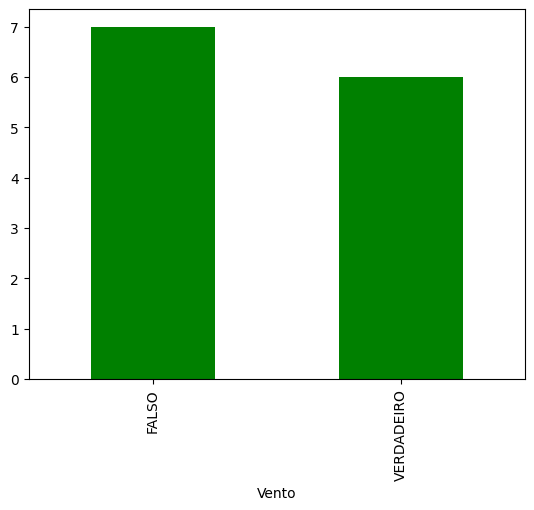

In [14]:
agrupado.plot.bar(color = 'green')

In [16]:
#Jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

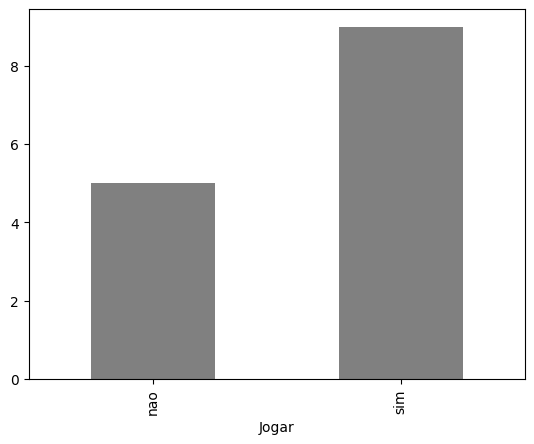

In [17]:
agrupado.plot.bar(color = 'gray')

### **Vizualização dos dados Numericos**


In [18]:
#Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

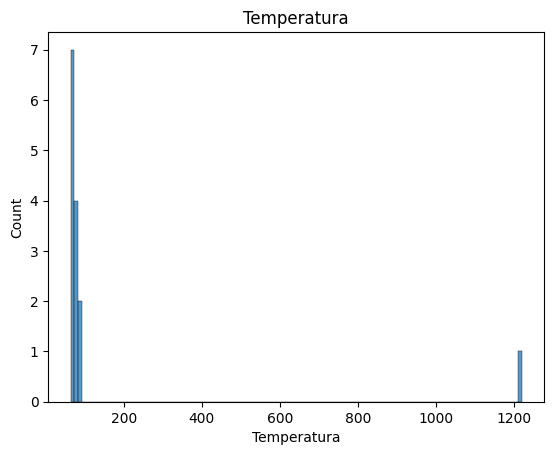

In [20]:
srn.histplot(dataset['Temperatura']).set_title('Temperatura')

In [21]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

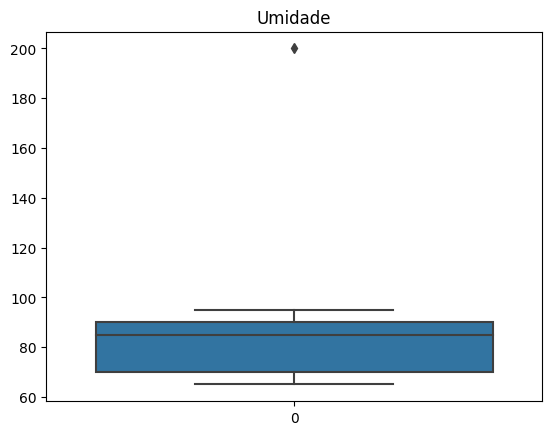

In [23]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

### **Tratamento dos dados**





Valores NA's no dataset

In [50]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [25]:
#tratamento da Aparencia
#substituir valores fora do dominio (sol, nublado e chuva)  pela moda
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [26]:
dataset.loc[dataset['Aparencia'] ==  'menos', 'Aparencia'] = "chuva"

In [27]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [31]:
#tratamento da Temperatura
#substituir valores fora do dominio (-130 a 130)  pela mediana
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [35]:
#Vizualizar valores fora do dominio
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [33]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [34]:
#subistituir o valor fora do padrão por mediana
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura' ] = mediana

In [44]:
#tratamento da Umidade
#substituir valores fora do dominio (0 a 100)  pela mediana
dataset['Umidade'].describe()

count    14.000000
mean     81.285714
std       9.585073
min      65.000000
25%      71.250000
50%      85.250000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

In [40]:
#Vizualizar valores fora do dominio
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [45]:
mediana = sts.median(dataset['Umidade'])
mediana

85.25

In [39]:
#subistituir o valor fora do padrão por mediana
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100),  'Umidade'] = mediana

In [42]:
#subsituição de valores NA pela mediana
dataset['Umidade'].fillna(mediana, inplace=True)

In [48]:
#tratamento da Vento
#substituir valores fora do dominio (Falso e Verdadeiro) e Valores NA pela moda
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [47]:
#subsituição de valores NA pela Moda
dataset['Vento'].fillna("FALSO", inplace=True)

In [49]:
#tratamento da Jogar
#substituir valores fora do dominio (sim, não) e Valores NA pela moda
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64